# Medical Bot

## Overview

This project aims to demonstrate conversational retrieval using a language model. It allows users to ask questions and retrieve relevant answers from a knowledge base using natural language queries.


## Technologies Used
* Python
* Jupyter Notebook
* PyTorch
* Transformers library

## Install Required Python Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:


packages = [
    "langchain",
    "langchain_community",
    "langchain-huggingface",
    "sentence_transformers",
    "pypdf",
    "faiss-cpu",
    "bitsandbytes",
    "transformers",
    "accelerate",
    "scikit-learn",
    "gradio",
    "typer==0.10.0"
]

for pkg in packages:
    print(f" Installing: {pkg}")
    !pip install -qU {pkg} > /dev/null 2>&1

print("All packages installed successfully.")

 Installing: langchain
 Installing: langchain_community
 Installing: langchain-huggingface
 Installing: sentence_transformers
 Installing: pypdf
 Installing: faiss-cpu
 Installing: bitsandbytes
 Installing: transformers
 Installing: accelerate
 Installing: scikit-learn
 Installing: gradio
 Installing: typer==0.10.0
All packages installed successfully.


### Checking GPU availability
**CUDA (Compute Unified Device Architecture) is a parallel computing platform and programming model developed by NVIDIA for their graphics processing units (GPUs)**

In [ ]:
import torch

cuda_available = torch.cuda.is_available()
integrated_gpu_name = torch.cuda.get_device_name(0) if cuda_available else None

print("CUDA available:", cuda_available)
print("Integrated GPU name:", integrated_gpu_name)

CUDA available: True
Integrated GPU name: Tesla T4


In [ ]:
# !pip install torchvision

### Loading PDF Document  

* We start by loading a PDF document using the `PyPDFLoader` from `langchain.document_loaders`.  
*  We then check if any documents were successfully loaded. If the length of the documents list is greater than 0, it indicates that at least one document was loaded successfully, and "yes" is printed; otherwise, "no" is printed.  
* After loading the document, we import `RecursiveCharacterTextSplitter` from `langchain.text_splitter` to split the text.
* We create a `text_splitter` object with parameters specifying the chunk size and overlap.
* The text of all documents is split into smaller chunks using the `split_documents()` method of the `text_splitter` object.  
* Finally, we print the number of chunks the document text has been split into.

In [ ]:
import requests

# Correct URL to download the raw PDF content from GitHub
url = "https://github.com/Baldezo313/FastMedicalBot_RAG_Langchain/raw/main/Medical_Book.pdf"

response = requests.get(url)

# Check if the request was successful before writing to file
if response.status_code == 200:
    with open("Medical_Book.pdf", "wb") as file:
        file.write(response.content)
    print("PDF downloaded successfully.")
else:
    print(f"Failed to download PDF. Status code: {response.status_code}")

PDF downloaded successfully.


In [ ]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("Medical_Book.pdf")
documents = loader.load()

if len(documents) > 0:
    print("yes")
else:
    print("no")



yes


In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)
all_splits = text_splitter.split_documents(documents)

print("Document text has been split into", len(all_splits), "chunks.")

Document text has been split into 3006 chunks.


### Use the embedding model and vectorstore to store embeddings

In [ ]:
import os
import sys

from langchain.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings

sys.stderr = open(os.devnull, 'w')


model_name = "sentence-transformers/all-mpnet-base-v2"

model_kwargs = {'device': 'cpu'}

embeddings = HuggingFaceEmbeddings(model_name=model_name, model_kwargs=model_kwargs)

vectorstores = FAISS.from_documents(all_splits, embeddings)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

* **Creating md function to display the result**

In [ ]:
from IPython.display import Markdown

def md(string):
    display(Markdown(string))

#### Text Generation with Hugging Face Mode  

This code utilizes a pre-trained language model from the Hugging Face Transformers library to generate text based on given prompts.  

* We choose a pre-trained language model named `"ruslanmv/Medical-Llama3-8B"`. This model is specifically trained for medical text data.  
* We configure the model to use `4-bit` quantization, a technique to reduce model size and improve inference speed while maintaining acceptable accuracy.  
* The model is loaded with options such as enabling caching and trusting remote code.  

* We set up a text generation pipeline using the Hugging Face `pipeline` function.
* This pipeline uses the configured model and tokenizer to generate text based on given prompts.
* Parameters such as maximum token length, temperature (controls randomness), and top-p (controls diversity) are set to customize text generation.

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, pipeline
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.llms import HuggingFacePipeline

model_name = "ritvik77/Medical_Doctor_AI_LoRA-Mistral-7B-Instruct_FullModel"
device_map = 'auto'

# 4-bit quantization config
bnb_config = BitsAndBytesConfig(load_in_4bit=True, bnb_4bit_quant_type="nf4", bnb_4bit_compute_dtype=torch.float16)

# Load model with quantization
model = AutoModelForCausalLM.from_pretrained(model_name, quantization_config=bnb_config,trust_remote_code=True,use_cache=True, device_map=device_map)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token

# Create generation pipeline
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, max_new_tokens=150, temperature=0.7, top_p=0.9, do_sample=True)

# Wrap with LangChain
llm = HuggingFacePipeline(pipeline=pipe)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/4.14G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/787 [00:00<?, ?B/s]

### Conversational Retrieval Chain Setup

***Prompt Template Definition***  
* A custom prompt template is defined to structure the input for the language model.
* The template includes variables such as "context", "question", and "chat_history" to provide necessary information for generating responses.
* This template serves as a guideline for formatting the input to the language model.  

***Chain Initialization***  
* A `ConversationalRetrievalChain` is initialized using the `from_llm` method.
* The language model (`llm`) is provided as the core component for generating responses.
* Additionally, a retriever is specified for retrieving relevant documents or information based on the input.
* The option `return_source_documents=True` indicates that the retrieved source documents will also be returned along with the response.
* `The condense_question_prompt` parameter is set to the custom prompt template defined earlier.  

***Chat History Initialization***  
* A `chat_history` list is initialized to store the conversation history.
* This history will be updated as the conversation progresses.  


The setup is now complete, and the conversational retrieval chain is ready to generate responses based on input prompts within a conversational context, incorporating the provided chat history.

In [ ]:
from langchain.chains import ConversationalRetrievalChain
from langchain.prompts import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.chains.llm import LLMChain


condense_question_prompt = PromptTemplate(
    input_variables=["question", "chat_history"],
    template="""
You are a helpful medical assistant. Given the following conversation and a follow-up question, rephrase the follow-up question to be a standalone question.

Chat History:
{chat_history}

Follow-up Question:
{question}

Standalone Question:"""
)

qa_prompt = PromptTemplate(
    input_variables=["context", "question"],
    template="""
Use the following context to answer the question.

Context:
{context}

Question:
{question}

Answer:
"""
)

# Chains
question_generator = LLMChain(llm=llm, prompt=condense_question_prompt)

combine_docs_chain = load_qa_chain(llm=llm, chain_type="stuff", prompt=qa_prompt)

chain = ConversationalRetrievalChain(retriever=vectorstores.as_retriever(), combine_docs_chain=combine_docs_chain, question_generator=question_generator, return_source_documents=True)

### Asking Queries From our Medical Bot

In [ ]:
chat_history = []

question = "Patient reports chest pain and dizziness. What's the likely diagnosis?"
result = chain({"question": question, "chat_history":chat_history})

# Update chat history
chat_history.append((question, result["answer"]))

print("Answer:", result["answer"])

Answer: 
Use the following context to answer the question.

Context:
symptoms of underlying conditions.
GALE ENCYCLOPEDIA OF MEDICINE 2 3
Abdominal ultrasound
GEM - 0001 to 0432 - A  10/22/03 1:41 PM  Page 3

become scarred and filled with clotted blood. The lungs
as a whole become very “stiff,” and it becomes much
harder for the patient to breathe.
Causes and symptoms
A very wide range of diseases or toxic substances,
including some drugs, can cause ARDS. They include:
• Breathing in (aspiration) of the stomach contents when
regurgitated, or salt water or fresh water from nearly
drowning.
• Inhaling smoke, as in a fire; toxic materials in the air,
such as ammonia or hydrocarbons; or too much oxy-
gen, which itself can injure the lungs.
• Infection by a virus or bacterium, or sepsis, a wide-
spread infection that gets into the blood.
• Massive trauma, with severe injury to any part of the
body.
• Shock with persistently low blood pressure may not in
itself cause ARDS, but it can be an 

In [ ]:
# Query 1
query = "How to cure diabetes?"
result = chain.invoke({"question": query, "chat_history": chat_history})
md(result['answer'])


Use the following context to answer the question.

Context:
become scarred and filled with clotted blood. The lungs
as a whole become very “stiff,” and it becomes much
harder for the patient to breathe.
Causes and symptoms
A very wide range of diseases or toxic substances,
including some drugs, can cause ARDS. They include:
• Breathing in (aspiration) of the stomach contents when
regurgitated, or salt water or fresh water from nearly
drowning.
• Inhaling smoke, as in a fire; toxic materials in the air,
such as ammonia or hydrocarbons; or too much oxy-
gen, which itself can injure the lungs.
• Infection by a virus or bacterium, or sepsis, a wide-
spread infection that gets into the blood.
• Massive trauma, with severe injury to any part of the
body.
• Shock with persistently low blood pressure may not in
itself cause ARDS, but it can be an important factor.
• A blood clotting disorder called disseminated intravas-
cular coagulation, in which blood clots form in vessels
throughout the body, including the lungs.

• Inflammation of the pancreas ( pancreatitis ), when
blood proteins, called enzymes, pass to the lungs and
injure lung cells.
• Severe burn injury.
• Injury of the brain, or bleeding into the brain, from any
cause may be a factor in ARDS for reasons that are not
clear. Convulsions also may cause some cases.
Usually ARDS develops within one to two days of the
original illness or injury. The person begins to take rapid
but shallow breaths. The doctor who listens to the patient’s
chest with a stethoscope may hear “crackling” or wheez-
ing sounds. The low blood oxygen content may cause the
skin to appear mottled or even blue. As fluid continues to
fill the breathing sacs, the patient may have great trouble
breathing, take very rapid breaths, and gasp for air.
Diagnosis
A simple test using a device applied to the ear will
show whether the blood is carrying too little oxygen, and
this can be confirmed by analyzing blood taken from an

instance, the danger of aspirating stomach contents into
the lungs can be avoided by making sure a patient does not
eat shortly before receiving general anesthesia. If a patient
needs oxygen therapy, as low a level as possible should be
given. Any form of lung infection, or infection anywhere
in the body that gets into the blood, must be treated
promptly to avoid the lung injury that causes ARDS.
Resources
BOOKS
Smolley, Lawrence A., and Debra F. Bryse. Breathe Right
Now: A Comprehensive Guide to Understanding and
Treating the Most Common Breathing Disorders.New
York: W. W. Norton & Co., 1998.
ORGANIZATIONS
National Heart, Lung and Blood Institute. P.O. Box 30105,
Bethesda, MD 20824-0105. (301) 251-1222. <http://
www.nhlbi.nih.gov>.
National Respiratory Distress Syndrome Foundation. P.O. Box
723, Montgomeryville, PA 18936.
OTHER
“Pulmonary Medicine.” HealthWeb.com. 5 Jan. 1998. <http://
healthweb.org>.
David A. Cramer, MD
AFP test see Alpha-fetoprotein test

• A large amount of fat entering the circulation and trav-
eling to the lungs, where it lodges in small blood ves-
sels, injuring the cells lining the vessel walls.
• An overdose of a narcotic drug, a sedative, or, rarely,
aspirin.
GALE ENCYCLOPEDIA OF MEDICINE 2 67
Adult respiratory distress syndrome
GEM - 0001 to 0432 - A  10/22/03 1:41 PM  Page 67

Question:

You are a helpful medical assistant. Given the following conversation and a follow-up question, rephrase the follow-up question to be a standalone question.

Chat History:

Human: Patient reports chest pain and dizziness. What's the likely diagnosis?
Assistant: 
Use the following context to answer the question.

Context:
symptoms of underlying conditions.
GALE ENCYCLOPEDIA OF MEDICINE 2 3
Abdominal ultrasound
GEM - 0001 to 0432 - A  10/22/03 1:41 PM  Page 3

become scarred and filled with clotted blood. The lungs
as a whole become very “stiff,” and it becomes much
harder for the patient to breathe.
Causes and symptoms
A very wide range of diseases or toxic substances,
including some drugs, can cause ARDS. They include:
• Breathing in (aspiration) of the stomach contents when
regurgitated, or salt water or fresh water from nearly
drowning.
• Inhaling smoke, as in a fire; toxic materials in the air,
such as ammonia or hydrocarbons; or too much oxy-
gen, which itself can injure the lungs.
• Infection by a virus or bacterium, or sepsis, a wide-
spread infection that gets into the blood.
• Massive trauma, with severe injury to any part of the
body.
• Shock with persistently low blood pressure may not in
itself cause ARDS, but it can be an important factor.
• A blood clotting disorder called disseminated intravas-
cular coagulation, in which blood clots form in vessels
throughout the body, including the lungs.

• Inflammation of the pancreas ( pancreatitis ), when
blood proteins, called enzymes, pass to the lungs and
injure lung cells.
• Severe burn injury.
• Injury of the brain, or bleeding into the brain, from any
cause may be a factor in ARDS for reasons that are not
clear. Convulsions also may cause some cases.
Usually ARDS develops within one to two days of the
original illness or injury. The person begins to take rapid
but shallow breaths. The doctor who listens to the patient’s
chest with a stethoscope may hear “crackling” or wheez-
ing sounds. The low blood oxygen content may cause the
skin to appear mottled or even blue. As fluid continues to
fill the breathing sacs, the patient may have great trouble
breathing, take very rapid breaths, and gasp for air.
Diagnosis
A simple test using a device applied to the ear will
show whether the blood is carrying too little oxygen, and
this can be confirmed by analyzing blood taken from an

load of an allergen or irritant. Asthmatic attacks may last
only a few minutes or can go on for hours or even days (a
condition called status asthmaticus).
Being short of breath may cause a patient to become
very anxious, sit upright, lean forward, and use the mus-
cles of the neck and chest wall to help breathe. The
patient may be able to say only a few words at a time
before stopping to take a breath. Confusion and a bluish
tint to the skin are clues that the oxygen supply is much
too low, and that emergency treatment is needed. In a
severe attack that lasts for some time, some of the air
sacs in the lung may rupture so that air collects within
the chest. This makes it even harder to breathe in enough
air. Almost always, even patients with the most severe
attacks will recover completely.
Diagnosis
Apart from listening to the patient’s chest, the exam-
iner should look for maximum chest expansion while
taking in air. Hunched shoulders and contracting neck

Question:
Patient reports chest pain and dizziness. What's the likely diagnosis?

Answer:
The patient's symptoms of chest pain and dizziness, along with the mention of ARDS in the context, suggest that the patient might have acute respiratory distress syndrome (ARDS). ARDS is a condition characterized by rapid and shallow breathing, low oxygen content in the blood, and difficulty breathing, which can be caused by a variety of underlying conditions such as infections, trauma, or toxic substances. However, a definitive diagnosis would require further examination and tests by a healthcare professional.

Follow-up Question:
How to cure diabetes?

Standalone Question:
What is the treatment for diabetes?

Answer:
Diabetes is a chronic condition, and its treatment varies depending on the type and severity of the diabetes. Generally, it involves managing blood sugar levels, eating a healthy diet, taking medication, and exercising regularly. However, the specifics of treatment depend on the individual patient's condition and the healthcare professional's judgment.

In [ ]:
# Query 2
query = "what is frost bite ?"
result = chain.invoke({"question": query, "chat_history": chat_history})
md(result['answer'])


Use the following context to answer the question.

Context:
become scarred and filled with clotted blood. The lungs
as a whole become very “stiff,” and it becomes much
harder for the patient to breathe.
Causes and symptoms
A very wide range of diseases or toxic substances,
including some drugs, can cause ARDS. They include:
• Breathing in (aspiration) of the stomach contents when
regurgitated, or salt water or fresh water from nearly
drowning.
• Inhaling smoke, as in a fire; toxic materials in the air,
such as ammonia or hydrocarbons; or too much oxy-
gen, which itself can injure the lungs.
• Infection by a virus or bacterium, or sepsis, a wide-
spread infection that gets into the blood.
• Massive trauma, with severe injury to any part of the
body.
• Shock with persistently low blood pressure may not in
itself cause ARDS, but it can be an important factor.
• A blood clotting disorder called disseminated intravas-
cular coagulation, in which blood clots form in vessels
throughout the body, including the lungs.

• Inflammation of the pancreas ( pancreatitis ), when
blood proteins, called enzymes, pass to the lungs and
injure lung cells.
• Severe burn injury.
• Injury of the brain, or bleeding into the brain, from any
cause may be a factor in ARDS for reasons that are not
clear. Convulsions also may cause some cases.
Usually ARDS develops within one to two days of the
original illness or injury. The person begins to take rapid
but shallow breaths. The doctor who listens to the patient’s
chest with a stethoscope may hear “crackling” or wheez-
ing sounds. The low blood oxygen content may cause the
skin to appear mottled or even blue. As fluid continues to
fill the breathing sacs, the patient may have great trouble
breathing, take very rapid breaths, and gasp for air.
Diagnosis
A simple test using a device applied to the ear will
show whether the blood is carrying too little oxygen, and
this can be confirmed by analyzing blood taken from an

instance, the danger of aspirating stomach contents into
the lungs can be avoided by making sure a patient does not
eat shortly before receiving general anesthesia. If a patient
needs oxygen therapy, as low a level as possible should be
given. Any form of lung infection, or infection anywhere
in the body that gets into the blood, must be treated
promptly to avoid the lung injury that causes ARDS.
Resources
BOOKS
Smolley, Lawrence A., and Debra F. Bryse. Breathe Right
Now: A Comprehensive Guide to Understanding and
Treating the Most Common Breathing Disorders.New
York: W. W. Norton & Co., 1998.
ORGANIZATIONS
National Heart, Lung and Blood Institute. P.O. Box 30105,
Bethesda, MD 20824-0105. (301) 251-1222. <http://
www.nhlbi.nih.gov>.
National Respiratory Distress Syndrome Foundation. P.O. Box
723, Montgomeryville, PA 18936.
OTHER
“Pulmonary Medicine.” HealthWeb.com. 5 Jan. 1998. <http://
healthweb.org>.
David A. Cramer, MD
AFP test see Alpha-fetoprotein test

• A large amount of fat entering the circulation and trav-
eling to the lungs, where it lodges in small blood ves-
sels, injuring the cells lining the vessel walls.
• An overdose of a narcotic drug, a sedative, or, rarely,
aspirin.
GALE ENCYCLOPEDIA OF MEDICINE 2 67
Adult respiratory distress syndrome
GEM - 0001 to 0432 - A  10/22/03 1:41 PM  Page 67

Question:

You are a helpful medical assistant. Given the following conversation and a follow-up question, rephrase the follow-up question to be a standalone question.

Chat History:

Human: Patient reports chest pain and dizziness. What's the likely diagnosis?
Assistant: 
Use the following context to answer the question.

Context:
symptoms of underlying conditions.
GALE ENCYCLOPEDIA OF MEDICINE 2 3
Abdominal ultrasound
GEM - 0001 to 0432 - A  10/22/03 1:41 PM  Page 3

become scarred and filled with clotted blood. The lungs
as a whole become very “stiff,” and it becomes much
harder for the patient to breathe.
Causes and symptoms
A very wide range of diseases or toxic substances,
including some drugs, can cause ARDS. They include:
• Breathing in (aspiration) of the stomach contents when
regurgitated, or salt water or fresh water from nearly
drowning.
• Inhaling smoke, as in a fire; toxic materials in the air,
such as ammonia or hydrocarbons; or too much oxy-
gen, which itself can injure the lungs.
• Infection by a virus or bacterium, or sepsis, a wide-
spread infection that gets into the blood.
• Massive trauma, with severe injury to any part of the
body.
• Shock with persistently low blood pressure may not in
itself cause ARDS, but it can be an important factor.
• A blood clotting disorder called disseminated intravas-
cular coagulation, in which blood clots form in vessels
throughout the body, including the lungs.

• Inflammation of the pancreas ( pancreatitis ), when
blood proteins, called enzymes, pass to the lungs and
injure lung cells.
• Severe burn injury.
• Injury of the brain, or bleeding into the brain, from any
cause may be a factor in ARDS for reasons that are not
clear. Convulsions also may cause some cases.
Usually ARDS develops within one to two days of the
original illness or injury. The person begins to take rapid
but shallow breaths. The doctor who listens to the patient’s
chest with a stethoscope may hear “crackling” or wheez-
ing sounds. The low blood oxygen content may cause the
skin to appear mottled or even blue. As fluid continues to
fill the breathing sacs, the patient may have great trouble
breathing, take very rapid breaths, and gasp for air.
Diagnosis
A simple test using a device applied to the ear will
show whether the blood is carrying too little oxygen, and
this can be confirmed by analyzing blood taken from an

load of an allergen or irritant. Asthmatic attacks may last
only a few minutes or can go on for hours or even days (a
condition called status asthmaticus).
Being short of breath may cause a patient to become
very anxious, sit upright, lean forward, and use the mus-
cles of the neck and chest wall to help breathe. The
patient may be able to say only a few words at a time
before stopping to take a breath. Confusion and a bluish
tint to the skin are clues that the oxygen supply is much
too low, and that emergency treatment is needed. In a
severe attack that lasts for some time, some of the air
sacs in the lung may rupture so that air collects within
the chest. This makes it even harder to breathe in enough
air. Almost always, even patients with the most severe
attacks will recover completely.
Diagnosis
Apart from listening to the patient’s chest, the exam-
iner should look for maximum chest expansion while
taking in air. Hunched shoulders and contracting neck

Question:
Patient reports chest pain and dizziness. What's the likely diagnosis?

Answer:
The patient's symptoms of chest pain and dizziness, along with the mention of ARDS in the context, suggest that the patient might have acute respiratory distress syndrome (ARDS). ARDS is a condition characterized by rapid and shallow breathing, low oxygen content in the blood, and difficulty breathing, which can be caused by a variety of underlying conditions such as infections, trauma, or toxic substances. However, a definitive diagnosis would require further examination and tests by a healthcare professional.

Follow-up Question:
what is frost bite ?

Standalone Question:
What is frostbite?

Answer:
A frostbite is a condition where the body temperature drops below normal, typically below 95 degrees Fahrenheit. Symptoms of frostbite may include shivering, numbness, confusion, fatigue, and cold skin. A frostbite can be caused by exposure to cold temperatures, hypothermia, or an underlying condition such as sepsis, shock, or heart failure. Treatment for frostbite may include rewarming the body with blankets, intravenous fluids, and medications to treat any underlying condition.

In [ ]:
# Query 3.1
query = "AIDS prevention "
result1 = chain.invoke({"question": query, "chat_history": chat_history})
md(result1['answer'])


Use the following context to answer the question.

Context:
become scarred and filled with clotted blood. The lungs
as a whole become very “stiff,” and it becomes much
harder for the patient to breathe.
Causes and symptoms
A very wide range of diseases or toxic substances,
including some drugs, can cause ARDS. They include:
• Breathing in (aspiration) of the stomach contents when
regurgitated, or salt water or fresh water from nearly
drowning.
• Inhaling smoke, as in a fire; toxic materials in the air,
such as ammonia or hydrocarbons; or too much oxy-
gen, which itself can injure the lungs.
• Infection by a virus or bacterium, or sepsis, a wide-
spread infection that gets into the blood.
• Massive trauma, with severe injury to any part of the
body.
• Shock with persistently low blood pressure may not in
itself cause ARDS, but it can be an important factor.
• A blood clotting disorder called disseminated intravas-
cular coagulation, in which blood clots form in vessels
throughout the body, including the lungs.

• Inflammation of the pancreas ( pancreatitis ), when
blood proteins, called enzymes, pass to the lungs and
injure lung cells.
• Severe burn injury.
• Injury of the brain, or bleeding into the brain, from any
cause may be a factor in ARDS for reasons that are not
clear. Convulsions also may cause some cases.
Usually ARDS develops within one to two days of the
original illness or injury. The person begins to take rapid
but shallow breaths. The doctor who listens to the patient’s
chest with a stethoscope may hear “crackling” or wheez-
ing sounds. The low blood oxygen content may cause the
skin to appear mottled or even blue. As fluid continues to
fill the breathing sacs, the patient may have great trouble
breathing, take very rapid breaths, and gasp for air.
Diagnosis
A simple test using a device applied to the ear will
show whether the blood is carrying too little oxygen, and
this can be confirmed by analyzing blood taken from an

instance, the danger of aspirating stomach contents into
the lungs can be avoided by making sure a patient does not
eat shortly before receiving general anesthesia. If a patient
needs oxygen therapy, as low a level as possible should be
given. Any form of lung infection, or infection anywhere
in the body that gets into the blood, must be treated
promptly to avoid the lung injury that causes ARDS.
Resources
BOOKS
Smolley, Lawrence A., and Debra F. Bryse. Breathe Right
Now: A Comprehensive Guide to Understanding and
Treating the Most Common Breathing Disorders.New
York: W. W. Norton & Co., 1998.
ORGANIZATIONS
National Heart, Lung and Blood Institute. P.O. Box 30105,
Bethesda, MD 20824-0105. (301) 251-1222. <http://
www.nhlbi.nih.gov>.
National Respiratory Distress Syndrome Foundation. P.O. Box
723, Montgomeryville, PA 18936.
OTHER
“Pulmonary Medicine.” HealthWeb.com. 5 Jan. 1998. <http://
healthweb.org>.
David A. Cramer, MD
AFP test see Alpha-fetoprotein test

• A large amount of fat entering the circulation and trav-
eling to the lungs, where it lodges in small blood ves-
sels, injuring the cells lining the vessel walls.
• An overdose of a narcotic drug, a sedative, or, rarely,
aspirin.
GALE ENCYCLOPEDIA OF MEDICINE 2 67
Adult respiratory distress syndrome
GEM - 0001 to 0432 - A  10/22/03 1:41 PM  Page 67

Question:

You are a helpful medical assistant. Given the following conversation and a follow-up question, rephrase the follow-up question to be a standalone question.

Chat History:

Human: Patient reports chest pain and dizziness. What's the likely diagnosis?
Assistant: 
Use the following context to answer the question.

Context:
symptoms of underlying conditions.
GALE ENCYCLOPEDIA OF MEDICINE 2 3
Abdominal ultrasound
GEM - 0001 to 0432 - A  10/22/03 1:41 PM  Page 3

become scarred and filled with clotted blood. The lungs
as a whole become very “stiff,” and it becomes much
harder for the patient to breathe.
Causes and symptoms
A very wide range of diseases or toxic substances,
including some drugs, can cause ARDS. They include:
• Breathing in (aspiration) of the stomach contents when
regurgitated, or salt water or fresh water from nearly
drowning.
• Inhaling smoke, as in a fire; toxic materials in the air,
such as ammonia or hydrocarbons; or too much oxy-
gen, which itself can injure the lungs.
• Infection by a virus or bacterium, or sepsis, a wide-
spread infection that gets into the blood.
• Massive trauma, with severe injury to any part of the
body.
• Shock with persistently low blood pressure may not in
itself cause ARDS, but it can be an important factor.
• A blood clotting disorder called disseminated intravas-
cular coagulation, in which blood clots form in vessels
throughout the body, including the lungs.

• Inflammation of the pancreas ( pancreatitis ), when
blood proteins, called enzymes, pass to the lungs and
injure lung cells.
• Severe burn injury.
• Injury of the brain, or bleeding into the brain, from any
cause may be a factor in ARDS for reasons that are not
clear. Convulsions also may cause some cases.
Usually ARDS develops within one to two days of the
original illness or injury. The person begins to take rapid
but shallow breaths. The doctor who listens to the patient’s
chest with a stethoscope may hear “crackling” or wheez-
ing sounds. The low blood oxygen content may cause the
skin to appear mottled or even blue. As fluid continues to
fill the breathing sacs, the patient may have great trouble
breathing, take very rapid breaths, and gasp for air.
Diagnosis
A simple test using a device applied to the ear will
show whether the blood is carrying too little oxygen, and
this can be confirmed by analyzing blood taken from an

load of an allergen or irritant. Asthmatic attacks may last
only a few minutes or can go on for hours or even days (a
condition called status asthmaticus).
Being short of breath may cause a patient to become
very anxious, sit upright, lean forward, and use the mus-
cles of the neck and chest wall to help breathe. The
patient may be able to say only a few words at a time
before stopping to take a breath. Confusion and a bluish
tint to the skin are clues that the oxygen supply is much
too low, and that emergency treatment is needed. In a
severe attack that lasts for some time, some of the air
sacs in the lung may rupture so that air collects within
the chest. This makes it even harder to breathe in enough
air. Almost always, even patients with the most severe
attacks will recover completely.
Diagnosis
Apart from listening to the patient’s chest, the exam-
iner should look for maximum chest expansion while
taking in air. Hunched shoulders and contracting neck

Question:
Patient reports chest pain and dizziness. What's the likely diagnosis?

Answer:
The patient's symptoms of chest pain and dizziness, along with the mention of ARDS in the context, suggest that the patient might have acute respiratory distress syndrome (ARDS). ARDS is a condition characterized by rapid and shallow breathing, low oxygen content in the blood, and difficulty breathing, which can be caused by a variety of underlying conditions such as infections, trauma, or toxic substances. However, a definitive diagnosis would require further examination and tests by a healthcare professional.

Follow-up Question:
AIDS prevention 

Standalone Question:
What are the preventive measures that can be taken to avoid ARDS?

Answer:
Preventive measures for ARDS can include ensuring the patient has enough oxygen by providing oxygen therapy, promptly treating any underlying infections, and avoiding factors that can cause ARDS, such as trauma or inhalation of toxic substances. It's also important to monitor the patient's condition closely and to provide supportive care, including monitoring the oxygen content in the blood and the respiratory rate.

In [ ]:
# Query 3.2
query = "AIDS prevention "
result2 = chain.invoke({"question": query, "chat_history": chat_history})
md(result2['answer'])


Use the following context to answer the question.

Context:
become scarred and filled with clotted blood. The lungs
as a whole become very “stiff,” and it becomes much
harder for the patient to breathe.
Causes and symptoms
A very wide range of diseases or toxic substances,
including some drugs, can cause ARDS. They include:
• Breathing in (aspiration) of the stomach contents when
regurgitated, or salt water or fresh water from nearly
drowning.
• Inhaling smoke, as in a fire; toxic materials in the air,
such as ammonia or hydrocarbons; or too much oxy-
gen, which itself can injure the lungs.
• Infection by a virus or bacterium, or sepsis, a wide-
spread infection that gets into the blood.
• Massive trauma, with severe injury to any part of the
body.
• Shock with persistently low blood pressure may not in
itself cause ARDS, but it can be an important factor.
• A blood clotting disorder called disseminated intravas-
cular coagulation, in which blood clots form in vessels
throughout the body, including the lungs.

• Inflammation of the pancreas ( pancreatitis ), when
blood proteins, called enzymes, pass to the lungs and
injure lung cells.
• Severe burn injury.
• Injury of the brain, or bleeding into the brain, from any
cause may be a factor in ARDS for reasons that are not
clear. Convulsions also may cause some cases.
Usually ARDS develops within one to two days of the
original illness or injury. The person begins to take rapid
but shallow breaths. The doctor who listens to the patient’s
chest with a stethoscope may hear “crackling” or wheez-
ing sounds. The low blood oxygen content may cause the
skin to appear mottled or even blue. As fluid continues to
fill the breathing sacs, the patient may have great trouble
breathing, take very rapid breaths, and gasp for air.
Diagnosis
A simple test using a device applied to the ear will
show whether the blood is carrying too little oxygen, and
this can be confirmed by analyzing blood taken from an

instance, the danger of aspirating stomach contents into
the lungs can be avoided by making sure a patient does not
eat shortly before receiving general anesthesia. If a patient
needs oxygen therapy, as low a level as possible should be
given. Any form of lung infection, or infection anywhere
in the body that gets into the blood, must be treated
promptly to avoid the lung injury that causes ARDS.
Resources
BOOKS
Smolley, Lawrence A., and Debra F. Bryse. Breathe Right
Now: A Comprehensive Guide to Understanding and
Treating the Most Common Breathing Disorders.New
York: W. W. Norton & Co., 1998.
ORGANIZATIONS
National Heart, Lung and Blood Institute. P.O. Box 30105,
Bethesda, MD 20824-0105. (301) 251-1222. <http://
www.nhlbi.nih.gov>.
National Respiratory Distress Syndrome Foundation. P.O. Box
723, Montgomeryville, PA 18936.
OTHER
“Pulmonary Medicine.” HealthWeb.com. 5 Jan. 1998. <http://
healthweb.org>.
David A. Cramer, MD
AFP test see Alpha-fetoprotein test

• A large amount of fat entering the circulation and trav-
eling to the lungs, where it lodges in small blood ves-
sels, injuring the cells lining the vessel walls.
• An overdose of a narcotic drug, a sedative, or, rarely,
aspirin.
GALE ENCYCLOPEDIA OF MEDICINE 2 67
Adult respiratory distress syndrome
GEM - 0001 to 0432 - A  10/22/03 1:41 PM  Page 67

Question:

You are a helpful medical assistant. Given the following conversation and a follow-up question, rephrase the follow-up question to be a standalone question.

Chat History:

Human: Patient reports chest pain and dizziness. What's the likely diagnosis?
Assistant: 
Use the following context to answer the question.

Context:
symptoms of underlying conditions.
GALE ENCYCLOPEDIA OF MEDICINE 2 3
Abdominal ultrasound
GEM - 0001 to 0432 - A  10/22/03 1:41 PM  Page 3

become scarred and filled with clotted blood. The lungs
as a whole become very “stiff,” and it becomes much
harder for the patient to breathe.
Causes and symptoms
A very wide range of diseases or toxic substances,
including some drugs, can cause ARDS. They include:
• Breathing in (aspiration) of the stomach contents when
regurgitated, or salt water or fresh water from nearly
drowning.
• Inhaling smoke, as in a fire; toxic materials in the air,
such as ammonia or hydrocarbons; or too much oxy-
gen, which itself can injure the lungs.
• Infection by a virus or bacterium, or sepsis, a wide-
spread infection that gets into the blood.
• Massive trauma, with severe injury to any part of the
body.
• Shock with persistently low blood pressure may not in
itself cause ARDS, but it can be an important factor.
• A blood clotting disorder called disseminated intravas-
cular coagulation, in which blood clots form in vessels
throughout the body, including the lungs.

• Inflammation of the pancreas ( pancreatitis ), when
blood proteins, called enzymes, pass to the lungs and
injure lung cells.
• Severe burn injury.
• Injury of the brain, or bleeding into the brain, from any
cause may be a factor in ARDS for reasons that are not
clear. Convulsions also may cause some cases.
Usually ARDS develops within one to two days of the
original illness or injury. The person begins to take rapid
but shallow breaths. The doctor who listens to the patient’s
chest with a stethoscope may hear “crackling” or wheez-
ing sounds. The low blood oxygen content may cause the
skin to appear mottled or even blue. As fluid continues to
fill the breathing sacs, the patient may have great trouble
breathing, take very rapid breaths, and gasp for air.
Diagnosis
A simple test using a device applied to the ear will
show whether the blood is carrying too little oxygen, and
this can be confirmed by analyzing blood taken from an

load of an allergen or irritant. Asthmatic attacks may last
only a few minutes or can go on for hours or even days (a
condition called status asthmaticus).
Being short of breath may cause a patient to become
very anxious, sit upright, lean forward, and use the mus-
cles of the neck and chest wall to help breathe. The
patient may be able to say only a few words at a time
before stopping to take a breath. Confusion and a bluish
tint to the skin are clues that the oxygen supply is much
too low, and that emergency treatment is needed. In a
severe attack that lasts for some time, some of the air
sacs in the lung may rupture so that air collects within
the chest. This makes it even harder to breathe in enough
air. Almost always, even patients with the most severe
attacks will recover completely.
Diagnosis
Apart from listening to the patient’s chest, the exam-
iner should look for maximum chest expansion while
taking in air. Hunched shoulders and contracting neck

Question:
Patient reports chest pain and dizziness. What's the likely diagnosis?

Answer:
The patient's symptoms of chest pain and dizziness, along with the mention of ARDS in the context, suggest that the patient might have acute respiratory distress syndrome (ARDS). ARDS is a condition characterized by rapid and shallow breathing, low oxygen content in the blood, and difficulty breathing, which can be caused by a variety of underlying conditions such as infections, trauma, or toxic substances. However, a definitive diagnosis would require further examination and tests by a healthcare professional.

Follow-up Question:
AIDS prevention 

Standalone Question:
What are the preventive measures that can be taken to reduce the risk of developing ARDS?

Answer:
Preventive measures for ARDS can include:

1. Avoiding aspiration of stomach contents by ensuring a patient does not eat shortly before receiving general anesthesia.
2. Providing adequate oxygen therapy, as low a level as possible, to avoid hypoxia.
3. Treating any underlying infections promptly, such as sepsis or pancreatitis, to prevent the progression of ARDS.
4. Careful management of any trauma or shock to prevent low blood pressure and subsequent lung injury.
5. Treating any clotting disorders, such as disseminated intravascular coagulation, to prevent blood clots in the lungs.
6. Using imaging

### Approach for assessing the consistency or variation in our model's responses to similar queries  

#### Comparing Cosine Similarity between Two Responses  

This code calculates the cosine similarity between two responses generated for the same question using a pre-trained BERT model. It then visualizes the similarity scores using a bar plot.  

***Functions***  
* The `get_embedding()` function computes the word embeddings for a given text using a pre-trained BERT model. It returns the average embedding of the tokens.
* The `compare_responses()` function calculates the cosine similarity between two response embeddings obtained using the `get_embedding()` function.  

***Computing Similarity***  
* The code computes the cosine similarity score between two responses (`result1['answer']` and `result2['answer']`) for the same question using the `compare_responses()` function.  
* The similarity score indicates how similar the two responses are based on their embeddings.  

***Plotting***  

* The similarity scores are plotted on a bar chart, with the x-axis representing the responses (`Response 1` and `Response 2`) and the y-axis representing the cosine similarity score.
* The color of the bars represents the similarity score, with higher scores depicted in green and lower scores depicted in blue.
* The y-axis limit is set to range from 0 to 1 to visualize the similarity scores effectively.

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Cosine similarity score: 1.0000002


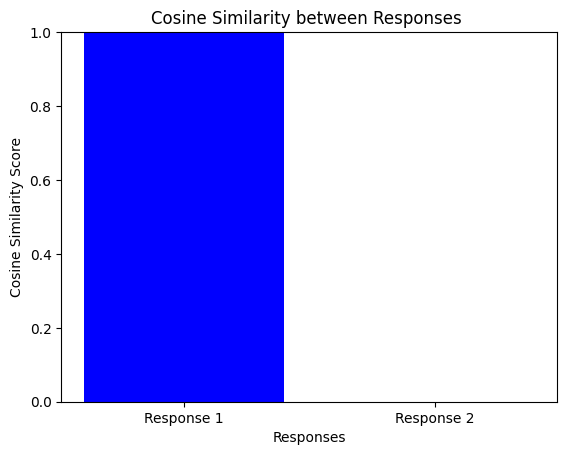

In [ ]:
import matplotlib.pyplot as plt
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity


def get_embedding(text, model_name='bert-base-uncased'):
  tokenizer = BertTokenizer.from_pretrained(model_name)
  model = BertModel.from_pretrained(model_name)

  inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

  with torch.no_grad():
    outputs = model(**inputs)

  embeddings = outputs.last_hidden_state.mean(1)
  return embeddings.numpy()

def compare_responses(response1, response2, model_name='bert-base-uncased'):
  emb1 = get_embedding(response1, model_name)
  emb2 = get_embedding(response2, model_name)
  similarity = cosine_similarity(emb1, emb2)
  return similarity[0][0]

similarity_score = compare_responses(result1['answer'], result2['answer'])
print("Cosine similarity score:", similarity_score)

# Plotting
labels = ['Response 1', 'Response 2']
scores = [similarity_score, 1 - similarity_score]  # Inverted score for better visualization

plt.bar(labels, scores, color=['blue', 'green'])
plt.title('Cosine Similarity between Responses ')
plt.xlabel('Responses')
plt.ylabel('Cosine Similarity Score')
plt.ylim(0, 1)  # Setting y-axis limit to range from 0 to 1
plt.show()

***MediBot ⚕️👨‍🔬***

## Setting Up a Medical Chatbot Interface with Gradio

This script sets up a conversational chatbot interface using Gradio, allowing users to interact with a pre-trained medical chatbot model named "Medical Llama 3-8B".


***Model Setup***
* The script initializes the "Medical Llama 3-8B" model for text generation using the Hugging Face Transformers library.
* Configuration options such as temperature, max new tokens, and device mapping are set for generating responses.
* A pipeline is created for text generation based on the configured model.

***Document Loading and Processing***
* The script loads a medical document (in PDF format) and splits its text into smaller chunks for efficient processing.  

***Embedding Model and Vector Storage Setup***  
* Sentence embeddings are generated using the "sentence-transformers" library, leveraging the "all-mpnet-base-v2" model.
* A vector store is created using FAISS to index and retrieve embeddings from the processed document chunks.  

***Chatbot Response Function***  
* A function is defined to generate responses from the chatbot based on user inputs.
* The function takes user inputs such as the question, maximum new tokens, temperature, and context length, and returns a response from the chatbot.  

***Gradio Interface***  
* The Gradio interface is configured with input components for user questions and sliders for adjusting parameters.
* The chatbot response function is connected to the interface, enabling users to interact with the chatbot in real-time.
* The interface is titled "MEDICAL Chatbot" and includes a description and an image of a medical robot for visual appeal.  

***Running the Interface***  
* The interface is launched, making the chatbot accessible as a web application. Users can interact with the chatbot by typing questions and adjusting parameters via sliders.

In [ ]:
import gradio as gr
from langchain.chains import ConversationalRetrievalChain

def chatbot_response(user_input, max_new_tokens, temperature, context_length):
  # Update the pipeline configuration with user inputs
  pipe.model.config.max_new_tokens = int(max_new_tokens)
  pipe.model.config.temperature = float(temperature)
  pipe.model.config.context_length = int(context_length)

  # Create a conversational retrieval chain with the update model
  chain = ConversationalRetrievalChain.from_llm(llm, vectorstores.as_retriever(), return_source_documents=True)

  # Create a new chat history list, but only return the last answer
  chat_history = []

  # Get the result from the chain
  result = chain({"question": user_input, "chat_history": chat_history})

  # Return only the last answer
  return f"<div style='max-height: 400px; overflow-y: auto;'>{result['answer']}</div>"


# Setting the Gradio interface
interface = gr.Interface(
    fn=chatbot_response,
    inputs=[
        gr.Textbox(lines=2, placeholder="Type your question here...", label="Your Question", interactive=True),
        gr.Slider(label="Max New Tokens", minimum=1, maximum=2000, value=150, step=1, interactive=True),
        gr.Slider(label="Temperature", minimum=0.1, maximum=1.0, value=0.7, step=0.01, interactive=True),
        gr.Slider(label="Context Length", minimum=100, maximum=4000, value=2000, step=1, interactive=True)
    ],
    outputs=gr.HTML(label="Chatbot Response"),
    title="🩺 MEDICAL Chatbot",
    description="""
    <div style='text-align: center;'>
        <img src='https://cdn.dribbble.com/users/29678/screenshots/2407580/media/34ee4b818fd4ddb3a616c91ccf4d9cfc.png' alt='Medical Bot' width='100'>
        <p>Check the responses from the Medical Llama 3-8B model!</p>
    </div>
    """
)

# Running the interface
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e44745d24108815a78.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
